#### Laboratorio 9 - Robots para el Mundial de Soccer
Stefano Aragoni, Luis Diego Santos, Carol Arevalo

-----------

Asuma que se le ha encargado crear un programa que se encargue de manejar de forma autónoma a un robot para que juegue en el mundial de soccer Para ello, como primer paso decide utilizar un acercamiento basado en lógica difusa para hacer que el robot se acerque a la pelota. 

Considerando que está en las primeras fases, aún no cuenta con un robot físico por lo cual decide programar una interfaz visual que muestre al robot, la pelota y una portería (véase a la imagen 1 como referencia). Es para esto que debe programar un sistema de lógica difusa que le ayude a su robot simulado a encontrar la pelota y a saber la fuerza con la que debe patear la pelota.

Considere que
- La posición (coordenadas) de la pelota siempre serán conocidas
- La posición (coordenadas) de la portería siempre será conocida
- La posición (coordenadas) del robot siempre podrán ser conocidas
- Debe definir un sistema de lógica difusa para encontrar la pelota
- Debe definir un sistema de lógica difusa para saber la fuerza con la que debe patear la pelota

----------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pygame

pygame 2.1.2 (SDL 2.0.18, Python 3.9.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


##### *Tasks*

1. **Variables crisp para encontrar la pelota**

- Las variables crisp (o variables de entrada) son la distancia entre el robot y la pelota, y el ángulo entre el robot y la pelota. 
    - La distancia puede ir entre 0 a 600 (dimensiones del mapa)
    - El ángulo puede ir entre 0 a 360 grados (o -180 a 180 grados)

2. **Variables lingüísticas para encontrar la pelota**

- Variables Lingüísticas de ENTRADA
    - Sobre el ángulo entre el robot y la pelota:
        - La pelota se encuentra a la izquierda del robot
        - La pelota se encuentra a la derecha del robot
        - La pelota se encuentra en frente del robot
        - La pelota se encuentra atrás del robot


    - Sobre la distancia entre el robot y la pelota:
        - La pelota se encuentra muy lejos del robot
        - La pelota se encuentra lejos del robot
        - La pelota se encuentra cerca del robot
        - La pelota se encuentra muy cerca del robot




- Variables Lingüísticas de SALIDA
    - Izquierda
    - Derecha
    - Adelante
    - Atrás



3. **Cláusulas de Horn para encontrar la pelota**

- IF (distancia *cerca OR mediana OR lejos*) AND (ángulo *frente*) THEN acción *moverse hacia adelante*
- IF (distancia *cerca OR mediana OR lejos*) AND (ángulo *atrás*) THEN acción *moverse hacia atrás*
- IF (distancia *cerca OR mediana OR lejos*) AND (ángulo *derecha*) THEN acción *moverse a la derecha*
- IF (distancia *cerca OR mediana OR lejos*) AND (ángulo *izquierda*) THEN acción *moverse a la izquierda*

4. **Defuzzificación para encontrar la pelota**

- El método del centroide se utiliza para la defuzzificación. En este caso, el resultado de la defuzzificación es el direccionamiento del robot hacia la pelota. Indica el ángulo o dirección en la que el robot debe moverse para acercarse a la pelota.

5. **Variables Crisp para saber la fuerza con la que se debe patear la pelota**
- La variable crisp (o variable de entrada) es la distancia entre el robot y la portería.

6. **Variables Lingüísticas para saber la fuerza con la que se debe patear la pelota**
- La fuerza se calculará en base a la distancia. Por tal razón, se definen 3 variables lingüísticas: cerca, media y lejos.

7. **Cláusulas de Horn para saber la fuerza con la que se debe patear la pelota**

- IF (distancia a la portería es CERCA) THEN (fuerza es DÉBIL)
- IF (distancia a la portería es MEDIO) THEN (fuerza es MEDIO)
- IF (distancia a la portería es LEJOS) THEN (fuerza es FUERTE)


8. **Defuzzificación para saber la fuerza con la que se debe patear la pelota**

- Nuevamente, se puede utilizar el método del centroide para la defuzzificación. En este caso, el resultado de la defuzzificación es la fuerza con la que se debe patear la pelota. Indica un valor entre 0 y 100 representando la fuerza con la que se debe patear la pelota, dependiendo de la distancia entre el robot y la portería.


9. **Grafique las funciones de pertenencia para encontrar la pelota**

A través de los gráficos, se puede observar que la distancia entre el robot y la pelota se puede clasificar en 3 categorías: cerca, media y lejos. Por otro lado, el ángulo entre el robot y la pelota se puede clasificar en 4 categorías: derecha, izquierda, frente y atrás. 

Estas graficas representan los rangos de valores que se pueden tomar para cada variable lingüística. Así permitiendo que "cerca", "media", y "lejos" -por ejemplo- sean valores que se puedan tomar en el sistema de lógica difusa.

Finalmente, cabe destacar que con la distancia y el ángulo se puede determinar la dirección en la que el robot debe moverse para acercarse y encontrar la pelota.

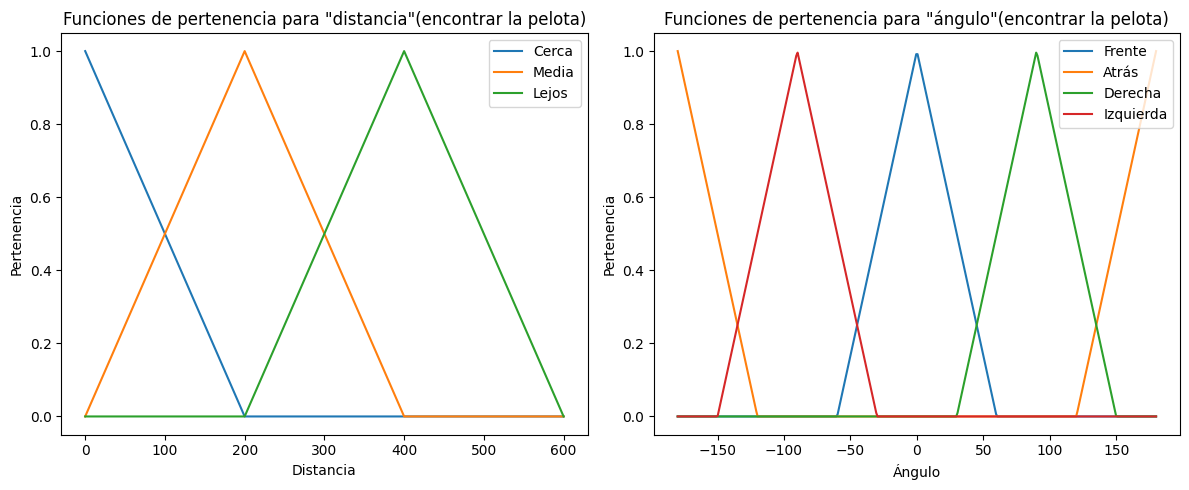

In [2]:
# Definición de las funciones de pertenencia para "distancia"
def pertenencia_distancia_cerca(x):
    return np.maximum(0, 1 - abs(x - 0) / 200)
def pertenencia_distancia_media(x):
    return np.maximum(0, 1 - abs(x - 200) / 200)
def pertenencia_distancia_lejos(x):
    return np.maximum(0, 1 - abs(x - 400) / 200)

# Definición de las funciones de pertenencia para "ángulo"
def pertenencia_angulo_frente(x):
    return np.maximum(0, 1 - abs(x - 0) / 60)
def combined_pertenencia_angulo_atras(x):
    membership1 = np.maximum(0, 1 - abs(x - 180) / 60)
    membership2 = np.maximum(0, 1 - abs(x + 180) / 60)
    return np.maximum(membership1, membership2)
def pertenencia_angulo_derecha(x):
    return np.maximum(0, 1 - abs(x - 90) / 60)
def pertenencia_angulo_izquierda(x):
    return np.maximum(0, 1 - abs(x + 90) / 60)

# Valores de entrada
x_distancia = np.linspace(0, 600, 100)
x_angulo = np.linspace(-180, 180, 360)

# Crear subplots lado a lado
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Graficar las funciones de pertenencia para "distancia"
axs[0].plot(x_distancia, pertenencia_distancia_cerca(x_distancia), label='Cerca')
axs[0].plot(x_distancia, pertenencia_distancia_media(x_distancia), label='Media')
axs[0].plot(x_distancia, pertenencia_distancia_lejos(x_distancia), label='Lejos')
axs[0].set_xlabel('Distancia')
axs[0].set_ylabel('Pertenencia')
axs[0].legend()
axs[0].set_title('Funciones de pertenencia para "distancia"'+ '(encontrar la pelota)')

# Graficar las funciones de pertenencia para "ángulo"
axs[1].plot(x_angulo, pertenencia_angulo_frente(x_angulo), label='Frente')
axs[1].plot(x_angulo, combined_pertenencia_angulo_atras(x_angulo), label='Atrás')
axs[1].plot(x_angulo, pertenencia_angulo_derecha(x_angulo), label='Derecha')
axs[1].plot(x_angulo, pertenencia_angulo_izquierda(x_angulo), label='Izquierda')
axs[1].set_xlabel('Ángulo')
axs[1].set_ylabel('Pertenencia')
axs[1].legend()
axs[1].set_title('Funciones de pertenencia para "ángulo"' + '(encontrar la pelota)')

plt.tight_layout()
plt.show()


10. **Grafique las funciones de pertenencia para saber la fuerza con la que se debe patear la pelota**

En el caso de la fuerza con la que se debe patear la pelota, este valor se determinará en base a la distancia entre el robot y la portería. Por tal razón, se definen 3 variables lingüísticas que hacen referencia a la distancia entre el robot y la portería: cerca, media y lejos.

Nuevamente, la gráfica representa los rangos de valores que se pueden tomar para cada variable lingüística. Así permitiendo que "cerca", "media", y "lejos" -por ejemplo- sean valores que se puedan tomar en el sistema de lógica difusa.

Text(0.5, 1.0, 'Funciones de pertenencia para "distancia"(fuerza para patear)')

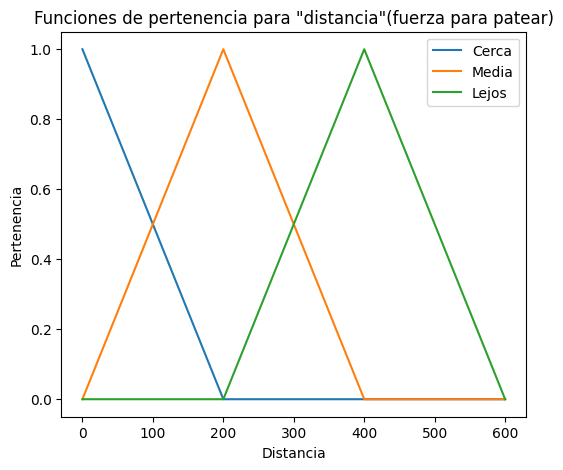

In [3]:
# Definición de las funciones de pertenencia para "distancia"
def pertenencia_distancia_cerca(x):
    return np.maximum(0, 1 - abs(x - 0) / 200)
def pertenencia_distancia_media(x):
    return np.maximum(0, 1 - abs(x - 200) / 200)
def pertenencia_distancia_lejos(x):
    return np.maximum(0, 1 - abs(x - 400) / 200)

# Valores de entrada
x_distancia = np.linspace(0, 600, 100)

# Crear subplot
fig, ax = plt.subplots(figsize=(6, 5))

# Graficar las funciones de pertenencia para "distancia"
ax.plot(x_distancia, pertenencia_distancia_cerca(x_distancia), label='Cerca')
ax.plot(x_distancia, pertenencia_distancia_media(x_distancia), label='Media')
ax.plot(x_distancia, pertenencia_distancia_lejos(x_distancia), label='Lejos')
ax.set_xlabel('Distancia')
ax.set_ylabel('Pertenencia')
ax.legend()
ax.set_title('Funciones de pertenencia para "distancia"' + '(fuerza para patear)')



11. Programe la interfaz gráfica donde se pueda seguir el movimiento del robot y la pelota

In [4]:
# --------------------------------------------------------------------------
# ----------------------------- INICIALIZACIÓN -----------------------------
# --------------------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import pygame


# Inicialización de Pygame
pygame.init()

# Dimensiones de la ventana
WIDTH, HEIGHT = 600, 600

# Colores
WHITE = (255, 255, 255)
RED = (255, 0, 0)
GREEN = (0, 128, 0)
BLACK = (0, 0, 0)
BLUE = (0, 0, 255)

# Ventana y reloj
win = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Robot Soccer")
clock = pygame.time.Clock()

# ------------------------------------------------------------------
# ----------------------------- CLASES -----------------------------
# ------------------------------------------------------------------

class Robot:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.speed = 1

    def move_towards(self, target_x, target_y):

    # --------- Lógica difusa encontrar la pelota ---------

        # Fuzzy Inputs / Variables Crisp
        dist = np.sqrt((target_x - self.x)**2 + (target_y - self.y)**2)
        angulo = np.arctan2(target_y - self.y, target_x - self.x) * 180 / np.pi
        

        # Funciones de pertenencia para "distancia" / Variables Lingüísticas
        cerca = pertenencia_distancia_cerca(dist)
        media = pertenencia_distancia_media(dist)
        lejos = pertenencia_distancia_lejos(dist)
        # Funciones de pertenencia para "ángulo" / Variables Lingüísticas
        frente = pertenencia_angulo_frente(angulo)
        atras = combined_pertenencia_angulo_atras(angulo)
        derecha = pertenencia_angulo_derecha(angulo)
        izquierda = pertenencia_angulo_izquierda(angulo)

        # Deffuzificación
        membership_functions_dist = [cerca, media, lejos]
        membership_functions_ang = [frente, atras, derecha, izquierda]

        membership_dist_index = [0, 1, 2]
        membership_ang_index = [0, 1, 2, 3]

        result_dist = np.average(membership_dist_index, weights=membership_functions_dist)
        result_ang = np.average(membership_ang_index, weights=membership_functions_ang)


    
        direction = (np.cos(result_ang * np.pi / 180), np.sin(result_ang * np.pi / 180))
        norm = np.sqrt(direction[0]**2 + direction[1]**2)
        direction = (direction[0] / norm, direction[1] / norm)

        self.x += direction[0] * self.speed
        self.y += direction[1] * self.speed

    def draw(self, win):
        pygame.draw.rect(win, BLACK, (self.x-10, self.y-20, 20, 40))  # Robot representado como un rectángulo

class Ball:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def move_towards(self, target_x, target_y, speed=4):
        direction = (target_x - self.x, target_y - self.y)
        norm = np.sqrt(direction[0]**2 + direction[1]**2)
        
        # Umbral de llegada
        if norm < 10:
            return

        direction = (direction[0] / norm, direction[1] / norm)

        self.x += direction[0] * speed
        self.y += direction[1] * speed

    def draw(self, win):
        pygame.draw.circle(win, WHITE, (int(self.x), int(self.y)), 15)

robot = Robot(200, HEIGHT // 2)
ball = Ball(400, HEIGHT // 2)

def redraw_window():
    # Dibuja el campo de fútbol
    win.fill(GREEN)
    pygame.draw.rect(win, WHITE, (WIDTH-150, HEIGHT//4, 5, HEIGHT//2))
    pygame.draw.circle(win, WHITE, (WIDTH//2, HEIGHT//2), 150, 5)  # Círculo central
    robot.draw(win)
    ball.draw(win)
    pygame.display.update()


def main():
    ball_kicked = False
    run = True
    while run:
        clock.tick(30)  # Limitamos a 30 FPS
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                run = False
        
        distance_to_ball = np.sqrt((robot.x - ball.x)**2 + (robot.y - ball.y)**2)
        
        # Si el robot está lo suficientemente cerca de la pelota, la pelota se mueve hacia la portería
        if distance_to_ball < 50 and not ball_kicked:
            ball_kicked = True
        
        if ball_kicked:
            ball.move_towards(WIDTH-150, HEIGHT//2)
        else:
            robot.move_towards(ball.x, ball.y)
        
        redraw_window()

    pygame.quit()

if __name__ == "__main__":
    main()


Distancia:  1.0
Ángulo:  0.0
Distancia:  0.995
Ángulo:  0.0
Distancia:  0.99
Ángulo:  0.0
Distancia:  0.985
Ángulo:  0.0
Distancia:  0.98
Ángulo:  0.0
Distancia:  0.975
Ángulo:  0.0
Distancia:  0.97
Ángulo:  0.0
Distancia:  0.965
Ángulo:  0.0
Distancia:  0.96
Ángulo:  0.0
Distancia:  0.955
Ángulo:  0.0
Distancia:  0.95
Ángulo:  0.0
Distancia:  0.945
Ángulo:  0.0
Distancia:  0.94
Ángulo:  0.0
Distancia:  0.935
Ángulo:  0.0
Distancia:  0.93
Ángulo:  0.0
Distancia:  0.925
Ángulo:  0.0
Distancia:  0.92
Ángulo:  0.0
Distancia:  0.915
Ángulo:  0.0
Distancia:  0.91
Ángulo:  0.0
Distancia:  0.905
Ángulo:  0.0
Distancia:  0.9
Ángulo:  0.0
Distancia:  0.895
Ángulo:  0.0
Distancia:  0.89
Ángulo:  0.0
Distancia:  0.885
Ángulo:  0.0
Distancia:  0.88
Ángulo:  0.0
Distancia:  0.875
Ángulo:  0.0
Distancia:  0.87
Ángulo:  0.0
Distancia:  0.865
Ángulo:  0.0
Distancia:  0.86
Ángulo:  0.0
Distancia:  0.855
Ángulo:  0.0
Distancia:  0.85
Ángulo:  0.0
Distancia:  0.845
Ángulo:  0.0
Distancia:  0.84
Ángulo:  

: 